# Visualization

This notebook is to create graphics for the report.

All data is from *graphics_data* folder. And all outputs go to *graphics_output*.

In [9]:
import matplotlib.pyplot as plt
from pyfonts import load_font
import pandas as pd
# Plotting the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

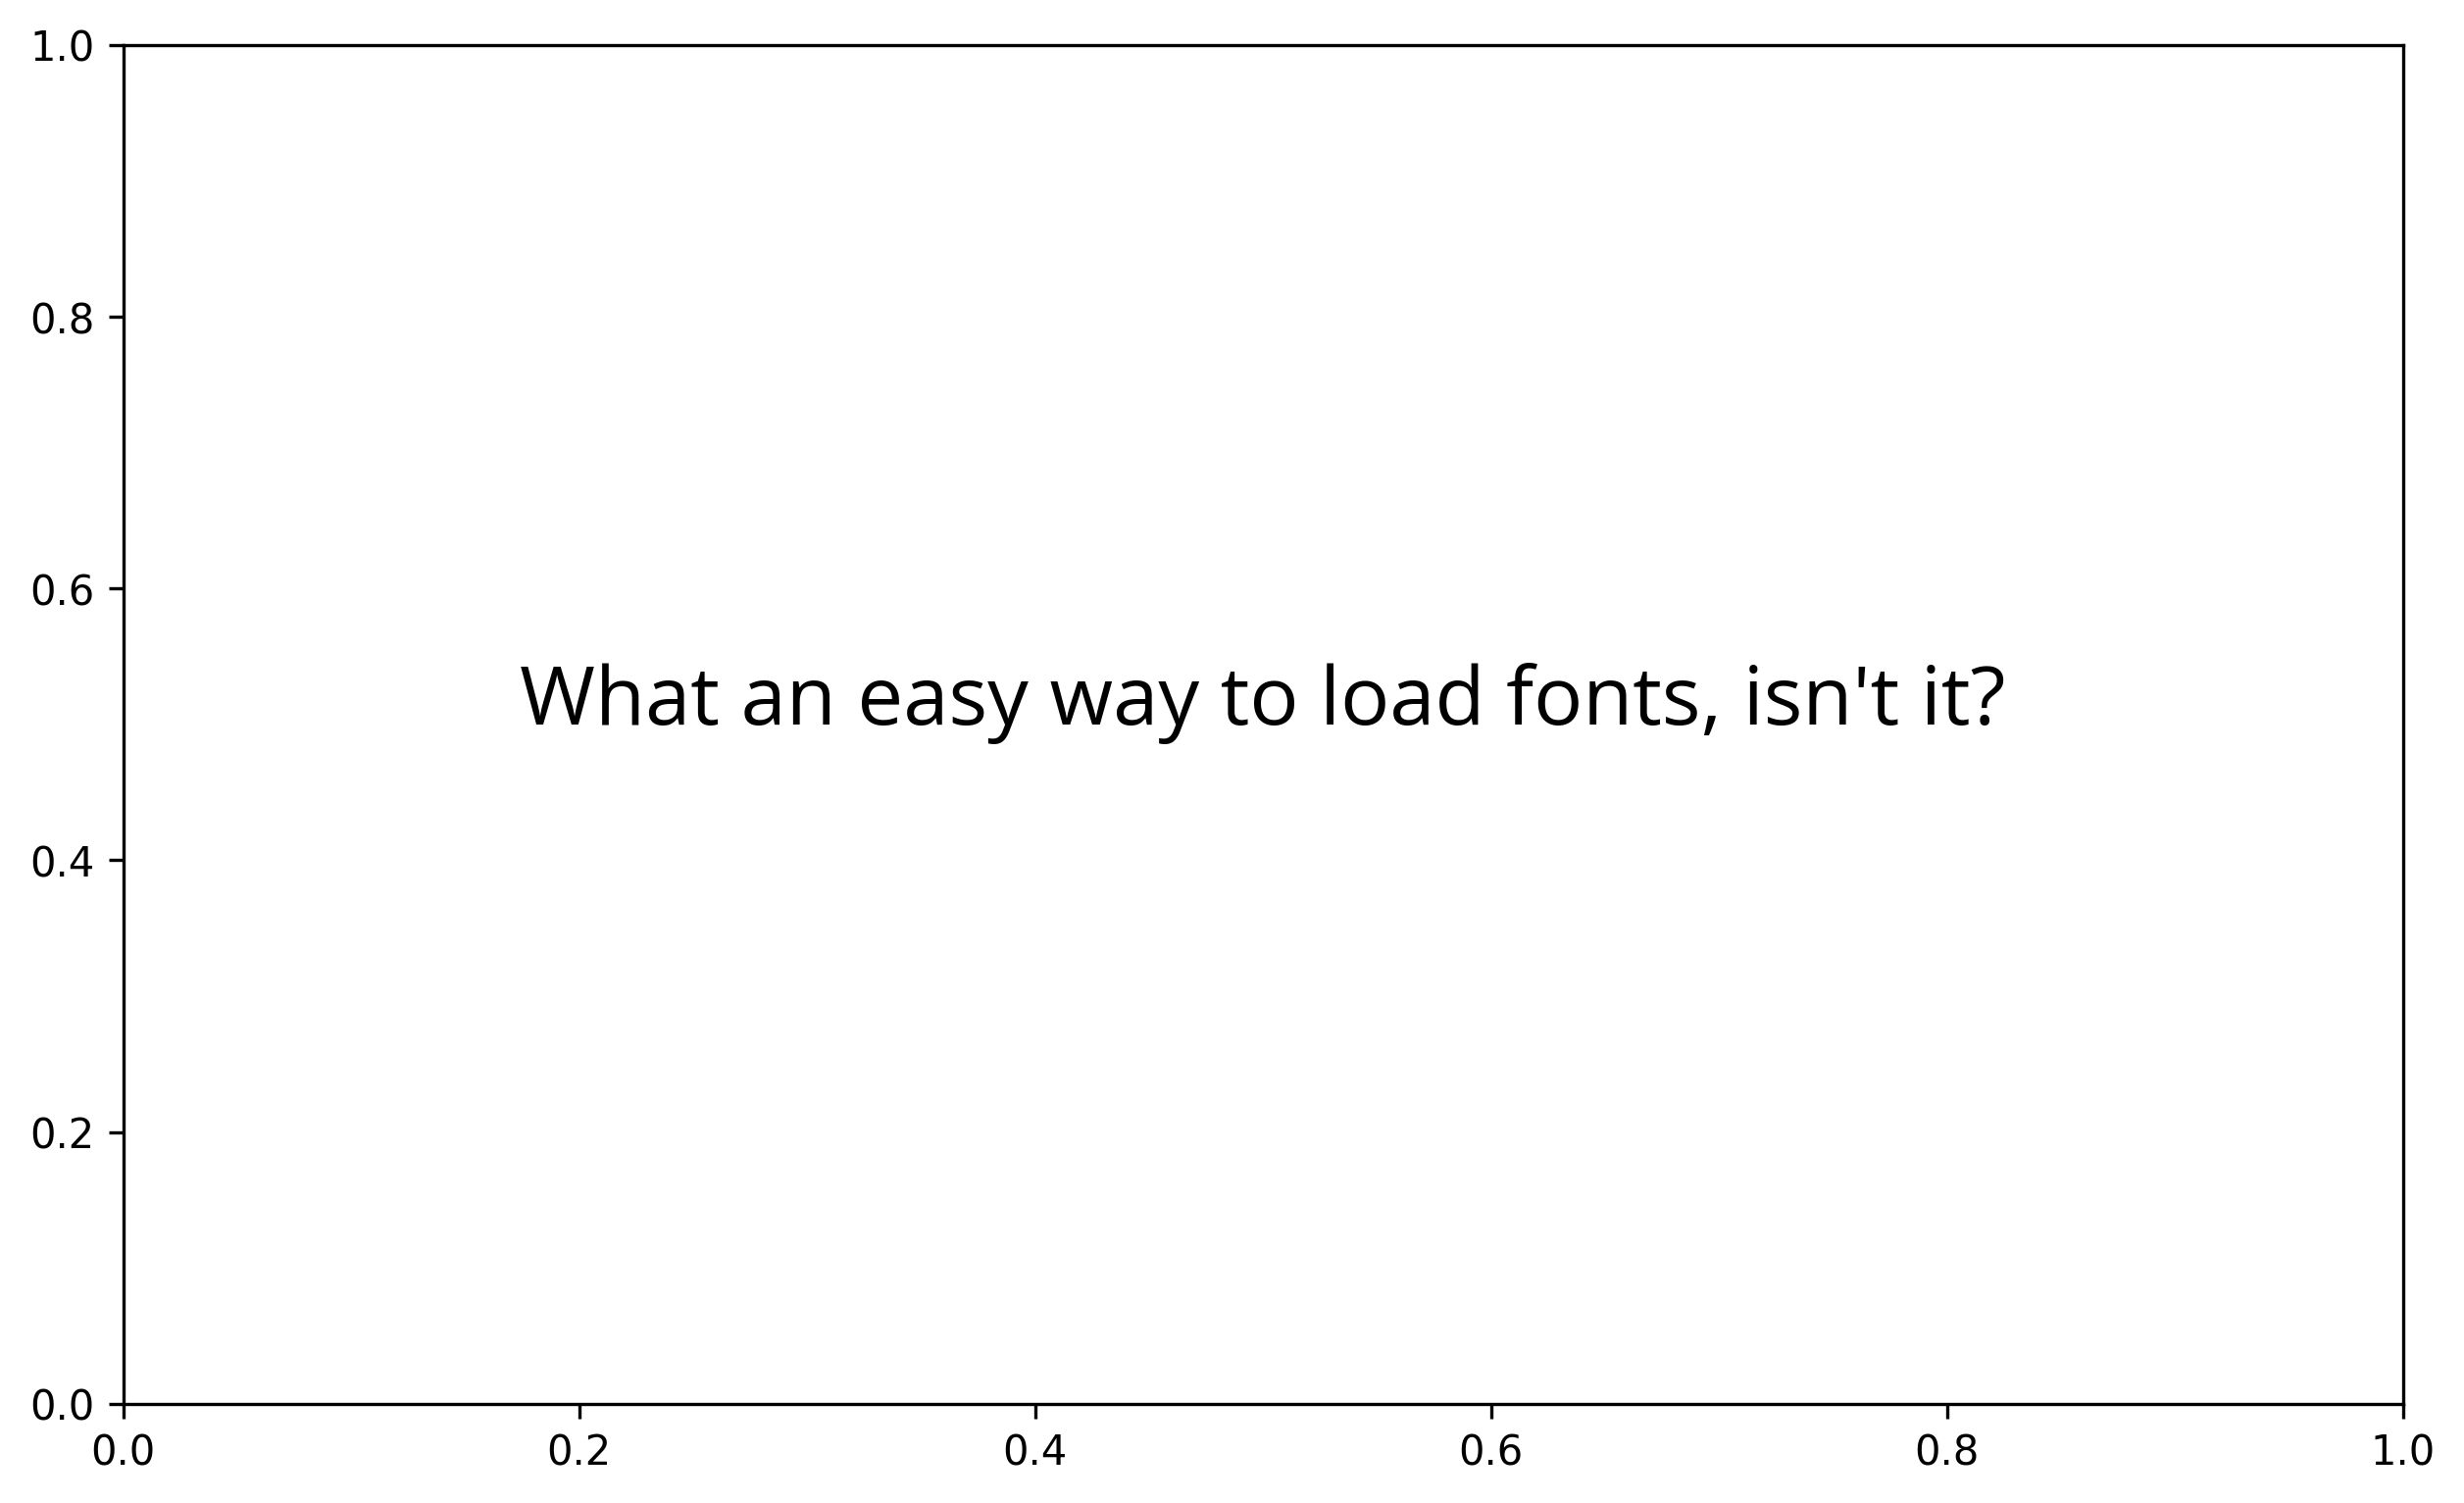

In [11]:
# load font
font = load_font(
   font_url="https://github.com/google/fonts/blob/main/ofl/opensans/OpenSans%5Bwdth%2Cwght%5D.ttf?raw=true"
)

# check how the font looks on a minimalist example
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
ax.text(
   x=0.5,
   y=0.5,
   s=f"What an easy way to load fonts, isn't it?",
   font=font,
   fontsize=20,
   ha="center",
)
plt.show()

## Practical Information

In [9]:
practical_date = pd.read_csv("graphics_data/practical_info_date.csv")
practical_date['date'] = pd.to_datetime(practical_date['date'], yearfirst=True)
practical_date['month_date'] = practical_date['date'].dt.strftime('%m-%d')

titles = ['Transportation', 'Power restoration', 'Food and water', 'Recovery and support', 'Missing people', 'Shelter', 'Medical service', 'Communication']
practical_date.replace(['transportation', 'power restoration', 'food and water', 'recovery and support', 'missing', 'shelter','medical service','communication'],titles, inplace=True)

practical_date['information'].unique()

/var/folders/cn/fww9r0gd1mg20td4q8v12_lsknvlj7/T/ipykernel_94307/2368060612.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  practical_date['date'] = pd.to_datetime(practical_date['date'], yearfirst=True)


array(['Communication', 'Food and water', 'Medical service',
       'Missing people', 'Power restoration', 'Recovery and support',
       'Shelter', 'Transportation'], dtype=object)

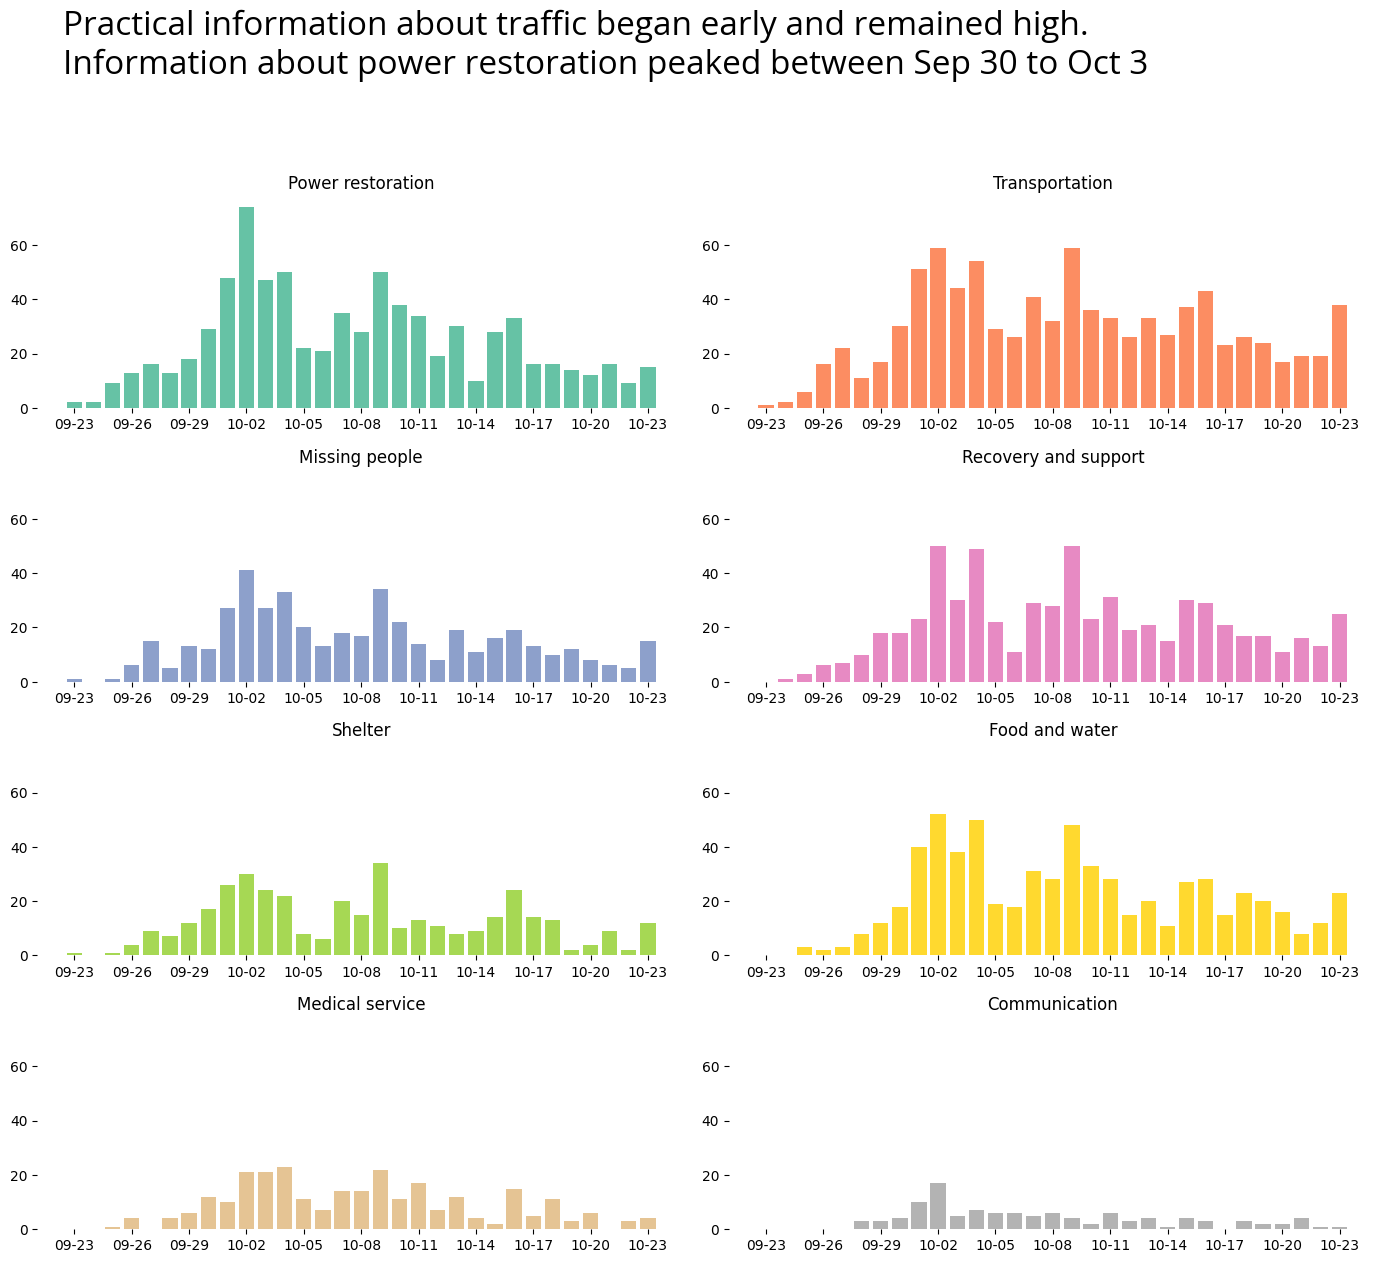

In [11]:
# categories = practical_date[practical_date['information'].isna() == False]['information'].unique()
categories = practical_date.groupby('information')['article'].count().reset_index().sort_values('article',ascending = False)['information'].unique()
fig, axes = plt.subplots(4, 2, figsize=(14, 12), sharex=True, sharey=True)
colors = sns.color_palette('Set2', len(categories))  # Generate distinct colors
i_color = 0
fig.suptitle("Practical information about traffic began early and remained high.\nInformation about power restoration peaked between Sep 30 to Oct 3", fontsize=24, y=1.05, font=font, fontweight = 'bold', x=0.05, horizontalalignment='left')

for ax, category in zip(axes.flat, categories):
    sub_data = practical_date[practical_date['information'] == category].sort_values("month_date")
    ax.bar(sub_data['month_date'], sub_data['article'], color=colors[i_color])
    ax.set_title(category)

    # Hide axes
    for pos in ['right', 'top', 'bottom', 'left']: 
        ax.spines[pos].set_visible(False) 
    # ax.tick_params(axis='x', rotation=45)
    ax.tick_params(top=False, which='both', bottom=True, left=True, right=False, labelleft='on', labelbottom='on')

    i_color+=1

plt.xticks(ticks=ax.get_xticks()[::3])
plt.tight_layout(pad=1.2)
# plt.margins(x=1, y=1)
plt.show()

# Save the transparent version
fig.savefig('graphics_output/3_practical_info_date_tp.png', transparent=True)

In [ ]:
p = pd.read_csv('graphics_data/practical_info_total.csv')
p['percentage'] = p['article'] / 1714
# p.to_csv('graphics_data/practical_info_total.csv',index=False)

## Topic Changes

In [6]:
topics = pd.read_csv('graphics_data/BERTopic_lables_final_1.csv')

# re-format date for more intuitive visualization
topics['date'] = pd.to_datetime(topics['date'], yearfirst=True)
topics['month_date'] = topics['date'].dt.strftime('%m-%d')

# Change category names to differentiate with "Disaster Recovery"
topics.replace("Disaster", "Disaster status", inplace=True)
topics.head()

/var/folders/cn/fww9r0gd1mg20td4q8v12_lsknvlj7/T/ipykernel_30356/826377863.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  topics['date'] = pd.to_datetime(topics['date'], yearfirst=True)


,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document,Category,date,month_date
0,boone samaritan purse alliance bible fellowshi...,3,3_boone_watauga_democrat_com,"['boone', 'watauga', 'democrat', 'com', 'commu...",['boone appalachian state university interim c...,boone - watauga - democrat - com - community -...,1.0,False,Disaster status,2024-10-02,10-02
1,attorney general josh stein declared state pri...,22,22_contractors_contractor_insurance_scammers,"['contractors', 'contractor', 'insurance', 'sc...",['never pay big deposit front always written c...,contractors - contractor - insurance - scammer...,1.0,False,Disaster Recovery,2024-10-02,10-02
2,widespread power outages due damage making nec...,3,3_boone_watauga_democrat_com,"['boone', 'watauga', 'democrat', 'com', 'commu...",['boone appalachian state university interim c...,boone - watauga - democrat - com - community -...,0.0,False,Disaster status,2024-10-02,10-02
3,300 line technicians consisting blue ridge ene...,6,6_power_energy_crews_lines,"['power', 'energy', 'crews', 'lines', 'line', ...",['aftermath decimated much western north carol...,power - energy - crews - lines - line - workin...,1.0,False,Disaster Recovery,2024-10-02,10-02
4,university virginia recruit c reynolds quarter...,0,0_yards_game_football_play,"['yards', 'game', 'football', 'play', 'season'...",['h football schedule scrambled venue unexpect...,yards - game - football - play - season - team...,1.0,False,Sports,2024-10-10,10-10


In [7]:
topic_date = topics.groupby(['Category', 'date'])['Document'].count().reset_index()
topic_date.to_csv("graphics_data/topic_date_1.csv", index=False)

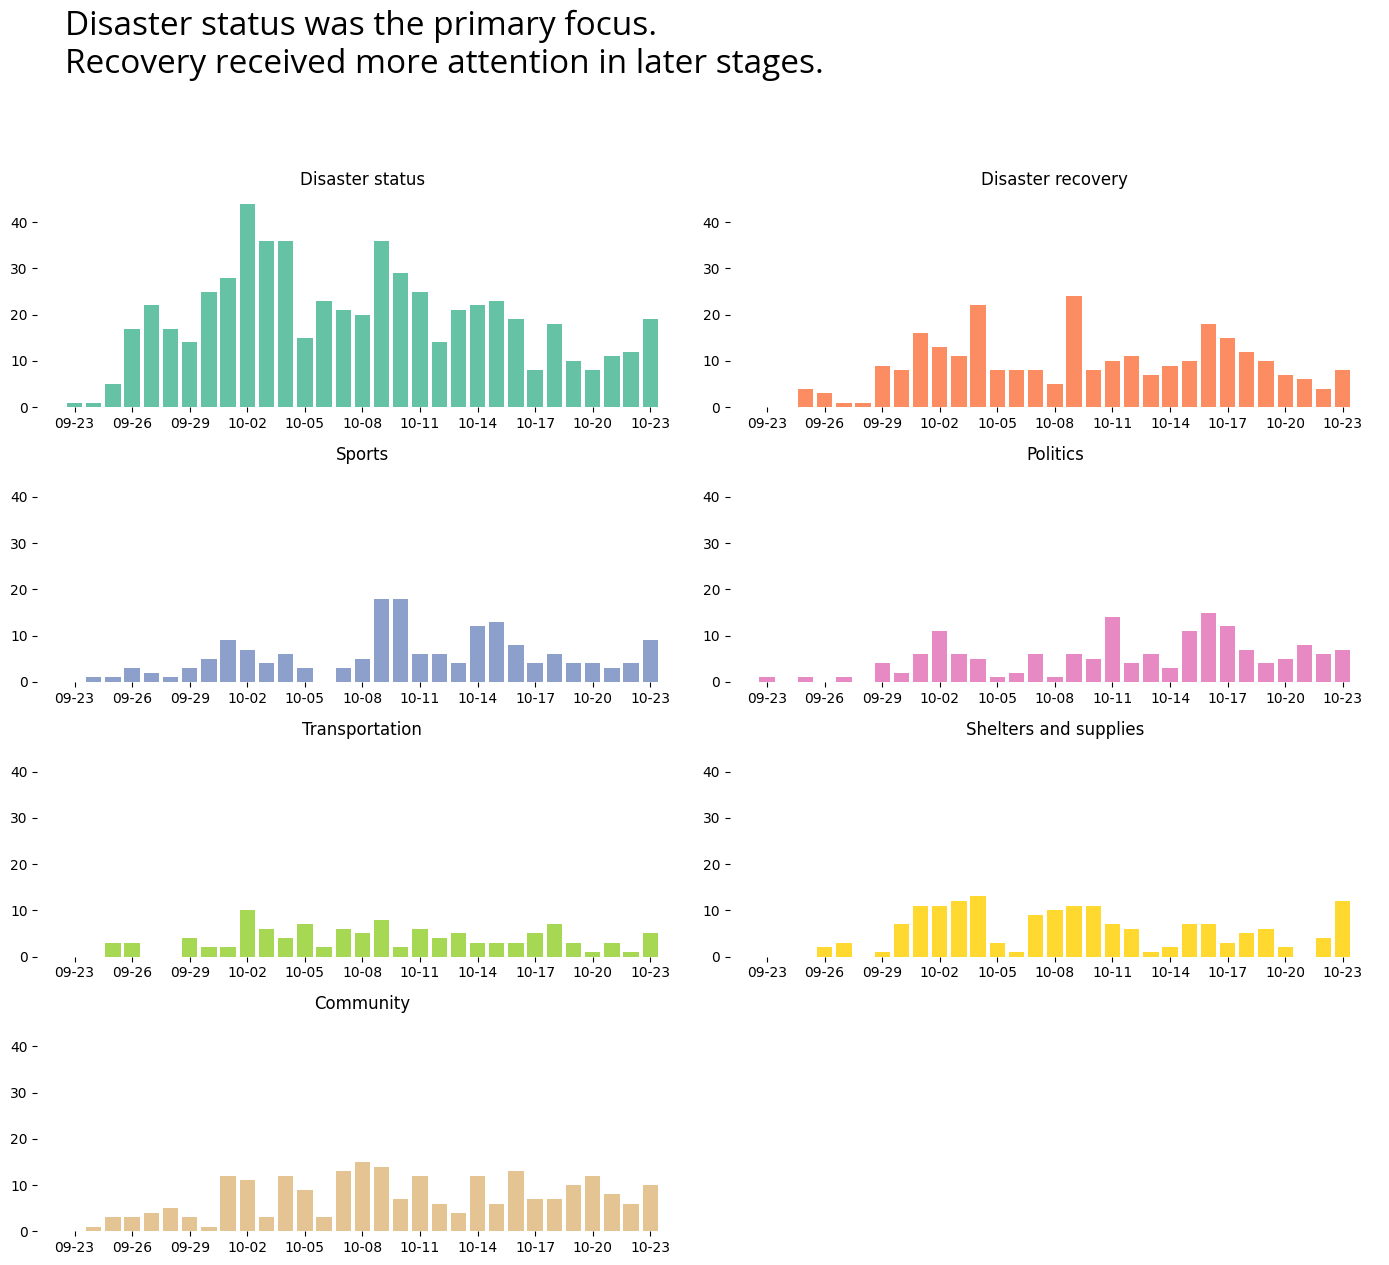

In [ ]:
categories = topics[topics['Category'].isna() == False]['Category'].unique()
fig, axes = plt.subplots(4, 2, figsize=(14, 12), sharex=True, sharey=True)
colors = sns.color_palette('Set2', len(categories))  # Generate distinct colors
i_color = 0
# plt.title("News Pieces with Practical Information Over Time")
fig.suptitle("Disaster status was the primary focus. \nRecovery received more attention in later stages.", fontsize=24, y=1.05, font=font, fontweight = 'black', x=0.05, horizontalalignment='left')

# Flatten the axes array for easy indexing
axes = axes.flatten()

for ax, category in zip(axes.flat, categories):
    sub_data = topics[topics['Category'] == category].groupby('month_date')['Document'].count().reset_index().sort_values("month_date")
    ax.bar(sub_data['month_date'], sub_data['Document'], color=colors[i_color])
    category = 'Disaster recovery' if category =='Disaster Recovery' else category
    ax.set_title(category)
    
    # Hide axes
    for pos in ['right', 'top', 'bottom', 'left']: 
        ax.spines[pos].set_visible(False) 

    ax.tick_params(top=False, which='both', bottom=True, left=True, right=False, labelleft='on', labelbottom='on')
    # ax.tick_params(axis='x', rotation=45)
    i_color+=1

# Hide the 8th subplot
axes[7].axis('off')

plt.xticks(ticks=ax.get_xticks()[::3])
plt.tight_layout()
plt.show()

# Save the transparent version
fig.savefig('graphics_output/1_topic_date_tp.png', transparent=True)


### Precentage data in final report

school, farm, daily life

In [13]:
len(topics[topics['Name'] == "45_students_school_schools_valle"])

23

In [14]:
len(topics[topics['Name'] == "28_farmers_farm_livestock_hay"])

20

Power, relief effort, organizational support

In [15]:
len(topics[topics['Name'] == "6_power_energy_crews_lines"])


56

## Originality

In [4]:
original = pd.read_csv('graphics_data/helene_articles_originality_final.csv')
original[original['originality'] == "original"]

,header,article,title,date,newspaper,author,word_count,article_text,originality
0,"Samaritan’s Purse, Alliance Bible Fellowship e...",BOONE — Samaritan's Purse and Alliance Bible F...,"Samaritan’s Purse, Alliance Bible Fellowship e...",24-10-02,Watauga Democrat,Luke Barber luke.barber@wataugademocrat.com,593.0,BOONE — Samaritan's Purse and Alliance Bible F...,original
1,Watch out for scammers as recovery efforts mov...,Attorney General Josh Stein declared the state...,Watch out for scammers as recovery efforts mov...,24-10-02,Watauga Democrat,Ben McNeely,379.0,Attorney General Josh Stein declared the state...,original
2,STORM RECOVERY: Carbon Monoxide Safety\nOctobe...,Widespread power outages due to damage from Hu...,STORM RECOVERY: Carbon Monoxide Safety,24-10-02,Watauga Democrat,Staff Writer,440.0,Widespread power outages due to damage from Hu...,original
3,Outage restoration continues with more than 40...,More than 300 line technicians consisting of B...,Outage restoration continues with more than 40...,24-10-02,Watauga Democrat,Moss Brennan moss.brennan@wataugademocrat.com,267.0,More than 300 line technicians consisting of B...,original
5,Applying for FEMA assistance in Gaston County\...,Gaston is one of 25 North Carolina counties ap...,Applying for FEMA assistance in Gaston County,24-10-10,Gaston Gazette,Chloe Collins; Gaston Gazette,319.0,Gaston is one of 25 North Carolina counties ap...,original
...,...,...,...,...,...,...,...,...,...
1702,SEVERE WEATHER Milton Threatens Florida\nOctob...,"Kirk expected to bring dangerous conditions, a...",SEVERE WEATHER Milton Threatens Florida,24-10-06,News Herald,ASSOCIATED PRESS,NaN,"Kirk expected to bring dangerous conditions, a...",original
1705,"Storm Death Reported in Burke\nOctober 9, 2024...",Power restored to most customers\nOne death at...,Storm Death Reported in Burke,24-10-09,News Herald,SARAH JOHNSON AND BILLY CHAPMAN,NaN,Power restored to most customers\nOne death at...,original
1710,Appeals panel hears arguments over DAC\nOctobe...,GEORGIA: A federal judge said Thursday that sh...,Appeals panel hears arguments over DAC,24-10-11,News Herald,NaN,NaN,GEORGIA: A federal judge said Thursday that sh...,original
1713,"Digest\nOctober 19, 2024 | News Herald, The (M...",HURRICANE AID: The federal government approved...,Digest,24-10-19,News Herald,NaN,NaN,HURRICANE AID: The federal government approved...,original
